In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv("StudentsPerformance(1).csv")

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

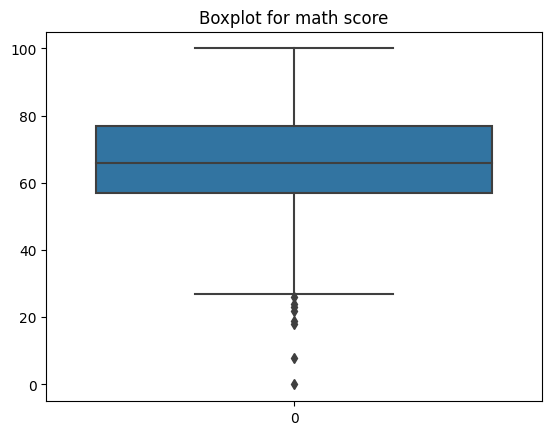

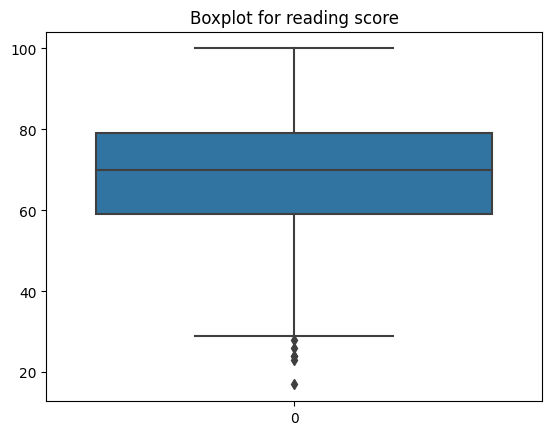

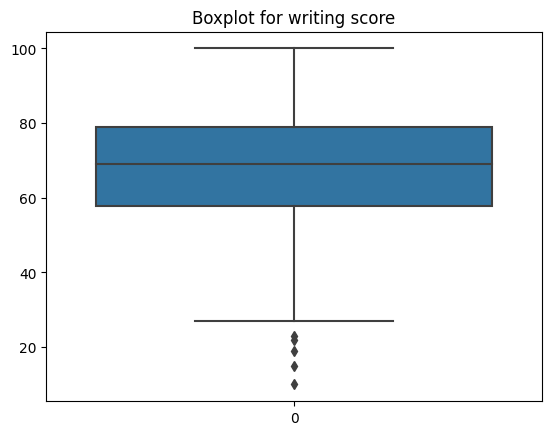

In [8]:
import matplotlib.pyplot as plt
for i in (df.columns):
    if(df.dtypes[i]!='object'):
        sns.boxplot(df[i])
        plt.title(f'Boxplot for {i}')
        plt.show()


<Axes: >

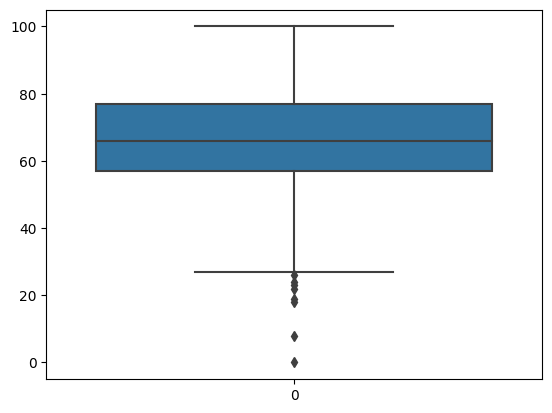

In [9]:
sns.boxplot(df['math score'])

<Axes: >

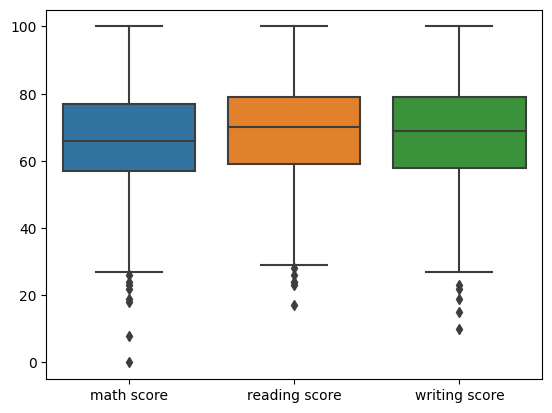

In [10]:
sns.boxplot(df)

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

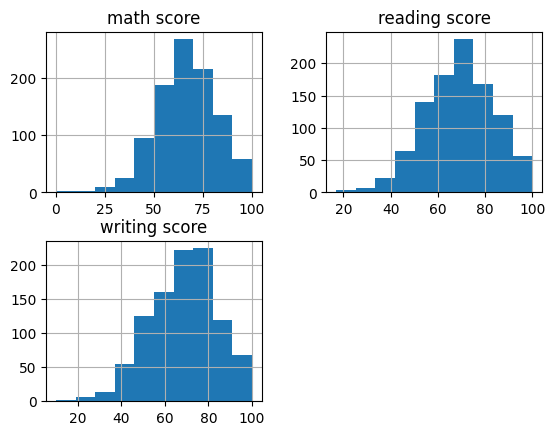

In [11]:
df.hist()

In [12]:
plt.show()

In [13]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [14]:
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder()

In [16]:
df['lunch']=label_encoder.fit_transform(df['lunch'])

In [17]:
df['lunch']

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    0
Name: lunch, Length: 1000, dtype: int64

In [18]:
count=0
for i in df['lunch']:
    if i==1:
        count=count+1

In [19]:
count

645

array([[<Axes: title={'center': 'lunch'}>,
        <Axes: title={'center': 'math score'}>],
       [<Axes: title={'center': 'reading score'}>,
        <Axes: title={'center': 'writing score'}>]], dtype=object)

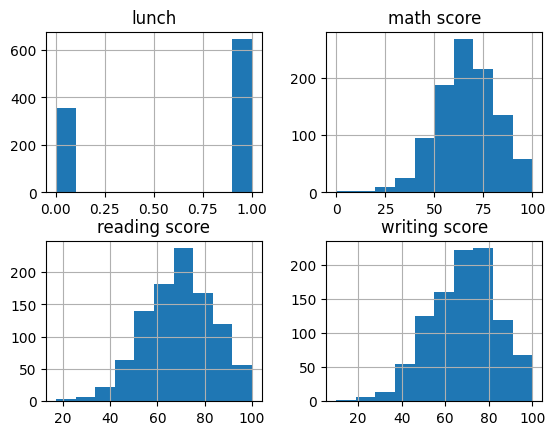

In [20]:
df.hist()

In [21]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,1,none,72,72,74
1,female,group C,some college,1,completed,69,90,88
2,female,group B,master's degree,1,none,90,95,93
3,male,group A,associate's degree,0,none,47,57,44
4,male,group C,some college,1,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,1,completed,88,99,95
996,male,group C,high school,0,none,62,55,55
997,female,group C,high school,0,completed,59,71,65
998,female,group D,some college,1,completed,68,78,77


In [22]:
df.skew()

/tmp/ipykernel_29979/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


lunch           -0.606955
math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [23]:
df.to_csv("before_skewremove.csv")

In [24]:
for i in(df.columns):
    if(df.dtypes[i]!='object' and i!='lunch'):
        print(df[i].skew())

-0.27893514909431694
-0.25910451810923063
-0.28944397150761897


In [25]:
Q1=df['math score'].quantile(0.25)
Q1

57.0

In [26]:
Q3=df['math score'].quantile(0.75)
Q3

77.0

In [27]:
IQR=Q3-Q1
threshold=1.5*IQR
threshold

30.0

In [28]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df1= df[(df['math score'] > lower) & (df['math score'] < upper)]

<Axes: >

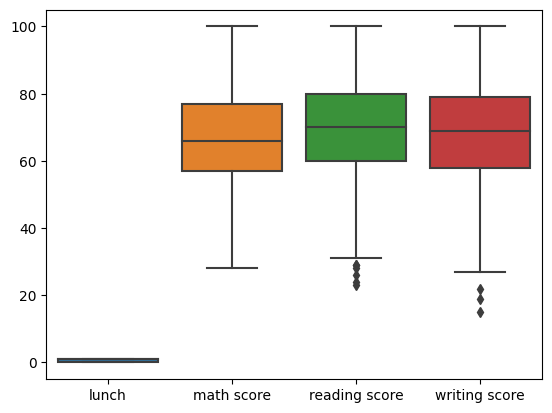

In [31]:
sns.boxplot(df1)

In [32]:
df1['math score'].skew()

-0.04619025513163576

In [ ]:
df1.to_save